# **European Football Leagues Analysis**

In this project, I did analysis on FIFA 22 dataset from [kaagle](https://www.kaggle.com/datasets/juniorverli/fifa-22-all-normal-players-from-ultimate-team?select=all_players.csv) website. The goal is to predict best player for each position and best possible squad player for Top Five European Leagues(Premier League, LaLiga Santander, Bundesliga, Serie A TIM, and Ligue 1 Uber Eats).

**Objective**

- Who are the best player for each position?
- What's the best european league squad?

**Dataset**
- 11K+ player featuring in FIFA 22
- Player and flag images
- Attributes based on actual data of the latest FIFA 22

# **1. Data Preparation**

## **1.1 Load Libraries and Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp/PROJECT/FIFA 2022/all_players.csv')

In [ ]:
df.head(3)

,id,name,img-player,position,team,img-team,league,img-league,nation,img-nation,...,height,workrates,type-card,over,attr1,attr2,attr3,attr4,attr5,attr6
0,1,A Lan,https://futhead.cursecdn.com/static/img/22/pla...,ST,Guangzhou FC,https://futhead.cursecdn.com/static/img/22/clu...,Chinese Football Association Super League,https://futhead.cursecdn.com/static/img/22/lea...,China PR,https://futhead.cursecdn.com/static/img/22/nat...,...,178cm,High/Low,Gold,77,84,75,68,81,33,72
1,2,A.J. DeLaGarza,https://futhead.cursecdn.com/static/img/22/pla...,RB,New England,https://futhead.cursecdn.com/static/img/22/clu...,Major League Soccer,https://futhead.cursecdn.com/static/img/22/lea...,Guam,https://futhead.cursecdn.com/static/img/22/nat...,...,175cm,Medium/High,Silver,65,64,48,61,62,63,68
2,3,Aapo Halme,https://futhead.cursecdn.com/static/img/22/pla...,CB,Barnsley,https://futhead.cursecdn.com/static/img/22/clu...,EFL Championship,https://futhead.cursecdn.com/static/img/22/lea...,Finland,https://futhead.cursecdn.com/static/img/22/nat...,...,196cm,Medium/Medium,Silver,65,47,21,45,55,63,71


In [ ]:
df.tail(3)

,id,name,img-player,position,team,img-team,league,img-league,nation,img-nation,...,height,workrates,type-card,over,attr1,attr2,attr3,attr4,attr5,attr6
11861,11862,Ștefan Radu,https://futhead.cursecdn.com/static/img/22/pla...,CB,Latium,https://futhead.cursecdn.com/static/img/22/clu...,Serie A TIM,https://futhead.cursecdn.com/static/img/22/lea...,Romania,https://futhead.cursecdn.com/static/img/22/nat...,...,183cm,Medium/High,Gold,77,61,64,65,68,82,73
11862,11863,Ștefan Târnovanu,https://futhead.cursecdn.com/static/img/22/pla...,GK,FCSB,https://futhead.cursecdn.com/static/img/22/clu...,Liga I,https://futhead.cursecdn.com/static/img/22/lea...,Romania,https://futhead.cursecdn.com/static/img/22/nat...,...,197cm,Medium/Medium,Bronze,61,61,58,64,59,38,62
11863,11864,Ștefan Vlădoiu,https://futhead.cursecdn.com/static/img/22/pla...,RB,Univ. Craiova,https://futhead.cursecdn.com/static/img/22/clu...,Liga I,https://futhead.cursecdn.com/static/img/22/lea...,Romania,https://futhead.cursecdn.com/static/img/22/nat...,...,178cm,Medium/Medium,Silver,68,87,35,55,60,62,69


In [ ]:
df.sample(3)

,id,name,img-player,position,team,img-team,league,img-league,nation,img-nation,...,height,workrates,type-card,over,attr1,attr2,attr3,attr4,attr5,attr6
8835,8836,Patrick Roberts,https://futhead.cursecdn.com/static/img/22/pla...,RM,Sunderland,https://futhead.cursecdn.com/static/img/22/clu...,EFL League One,https://futhead.cursecdn.com/static/img/22/lea...,England,https://futhead.cursecdn.com/static/img/22/nat...,...,170cm,Medium/Low,Silver,71,76,64,68,79,27,39
11420,11421,Xaver Schlager,https://futhead.cursecdn.com/static/img/22/pla...,CDM,VfL Wolfsburg,https://futhead.cursecdn.com/static/img/22/clu...,Bundesliga,https://futhead.cursecdn.com/static/img/22/lea...,Austria,https://futhead.cursecdn.com/static/img/22/nat...,...,174cm,High/High,Gold,80,69,70,73,77,73,81
2762,2763,Doğan Erdoğan,https://futhead.cursecdn.com/static/img/22/pla...,CM,Gaziantep,https://futhead.cursecdn.com/static/img/22/clu...,Süper Lig,https://futhead.cursecdn.com/static/img/22/lea...,Turkey,https://futhead.cursecdn.com/static/img/22/nat...,...,182cm,Medium/Medium,Silver,66,64,54,65,66,60,69


## **1.2 Summarize Data**

In [ ]:
# Check columns
df.columns

Index(['id', 'name', 'img-player', 'position', 'team', 'img-team', 'league',
       'img-league', 'nation', 'img-nation', 'strong-foot', 'skill-moves',
       'weak-foot', 'birth-date', 'height', 'workrates', 'type-card', 'over',
       'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6'],
      dtype='object')

In [ ]:
# Select interesting columns
interesting_columns = ['name', 'position', 'team', 'league', 'nation', 'over']
df = pd.DataFrame(df, columns=interesting_columns)

In [ ]:
df.head(3)

,name,position,team,league,nation,over
0,A Lan,ST,Guangzhou FC,Chinese Football Association Super League,China PR,77
1,A.J. DeLaGarza,RB,New England,Major League Soccer,Guam,65
2,Aapo Halme,CB,Barnsley,EFL Championship,Finland,65


In [ ]:
# Check general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11864 entries, 0 to 11863
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      11864 non-null  object
 1   position  11864 non-null  object
 2   team      11864 non-null  object
 3   league    11864 non-null  object
 4   nation    11864 non-null  object
 5   over      11864 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 556.2+ KB


## **1.3 Preprocess Data**

In [ ]:
# Check missing value
df.isna().sum()

name        0
position    0
team        0
league      0
nation      0
over        0
dtype: int64

In [ ]:
# Select object columns
df_object = df.select_dtypes('object')
df_object

,name,position,team,league,nation
0,A Lan,ST,Guangzhou FC,Chinese Football Association Super League,China PR
1,A.J. DeLaGarza,RB,New England,Major League Soccer,Guam
2,Aapo Halme,CB,Barnsley,EFL Championship,Finland
3,Aaron Appindangoye,CB,Sivasspor,Süper Lig,Gabon
4,Aaron Chapman,GK,Gillingham,EFL League One,England
...,...,...,...,...,...
11859,Ștefan Dobre,GK,Academica,Liga I,Romania
11860,Ștefan Fara,GK,FC Dinamo 1948,Liga I,Romania
11861,Ștefan Radu,CB,Latium,Serie A TIM,Romania
11862,Ștefan Târnovanu,GK,FCSB,Liga I,Romania


In [ ]:
# Check the unique values in each column
for col in df_object:
    print(f'Column: {col}','\n')
    print(df_object[col].value_counts(),'\n')

Column: name 

Paulinho              7
Gabriel               4
Danilo                4
Jesús Angulo          3
Adama Traoré          3
                     ..
Harrison Delbridge    1
Harrison Reed         1
Harrison Sharp        1
Harry Anderson        1
Ștefan Vlădoiu        1
Name: name, Length: 10899, dtype: int64 

Column: position 

CB     1965
GK     1864
ST     1533
CM     1207
CDM    1036
RB      780
LB      751
LM      669
CAM     636
RM      619
RW      270
LW      233
LWB     105
RWB      95
CF       95
LF        4
RF        2
Name: position, dtype: int64 

Column: team 

FC Barcelona        36
Nott'm Forest       35
Newcastle Utd       35
Genoa               34
R. Valladolid CF    34
                    ..
América de Cali      1
Libertad             1
Sporting Cristal     1
Lanús                1
River Plate          1
Name: team, Length: 632, dtype: int64 

Column: league 

EFL Championship                             598
LaLiga Santander                             594
Ma

No missing numerical and categorical values

In [ ]:
# Check duplicate value
df.duplicated().sum()

2

There are 2 duplicate data

In [ ]:
# Locate duplicate values
df[df.duplicated(keep=False)].sort_values('name').head()

,name,position,team,league,nation,over
6948,Mahmoud Dahoud,CM,Borussia Dortmund,Bundesliga,Germany,79
6949,Mahmoud Dahoud,CM,Borussia Dortmund,Bundesliga,Germany,79
9200,Rafinha,CM,Paris SG,Ligue 1 Uber Eats,Brazil,80
9201,Rafinha,CM,Paris SG,Ligue 1 Uber Eats,Brazil,80


In [ ]:
# Drop duplicated data
df = df.drop_duplicates()
df.duplicated().sum()

0

Duplicated data already dropped

In [ ]:
# Rename column name
df = df.rename(columns={'over': 'Overall'})
df.head(3)

,name,position,team,league,nation,Overall
0,A Lan,ST,Guangzhou FC,Chinese Football Association Super League,China PR,77
1,A.J. DeLaGarza,RB,New England,Major League Soccer,Guam,65
2,Aapo Halme,CB,Barnsley,EFL Championship,Finland,65


In [ ]:
# Capitalize column name
df.columns = map(lambda x: str(x).capitalize(), df.columns)
df.head(3)

,Name,Position,Team,League,Nation,Overall
0,A Lan,ST,Guangzhou FC,Chinese Football Association Super League,China PR,77
1,A.J. DeLaGarza,RB,New England,Major League Soccer,Guam,65
2,Aapo Halme,CB,Barnsley,EFL Championship,Finland,65


# **2. Data Visualization**

## **2.1 Player Overall**

Text(0.5, 1.0, 'Grouping Players by Overall')

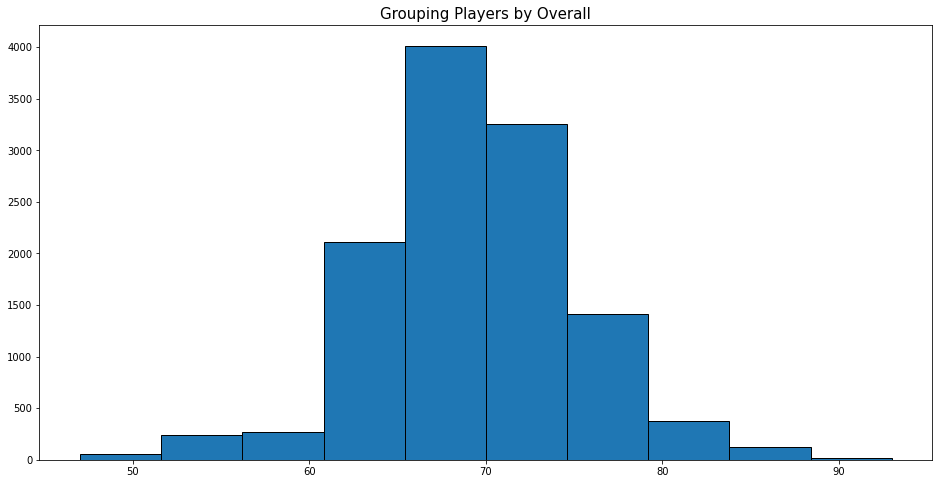

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.hist(df['Overall'], edgecolor = 'black')
plt.title('Grouping Players by Overall', fontsize=15)

Player overall distribution maximum in range 60~70

## **2.2 Player Position**

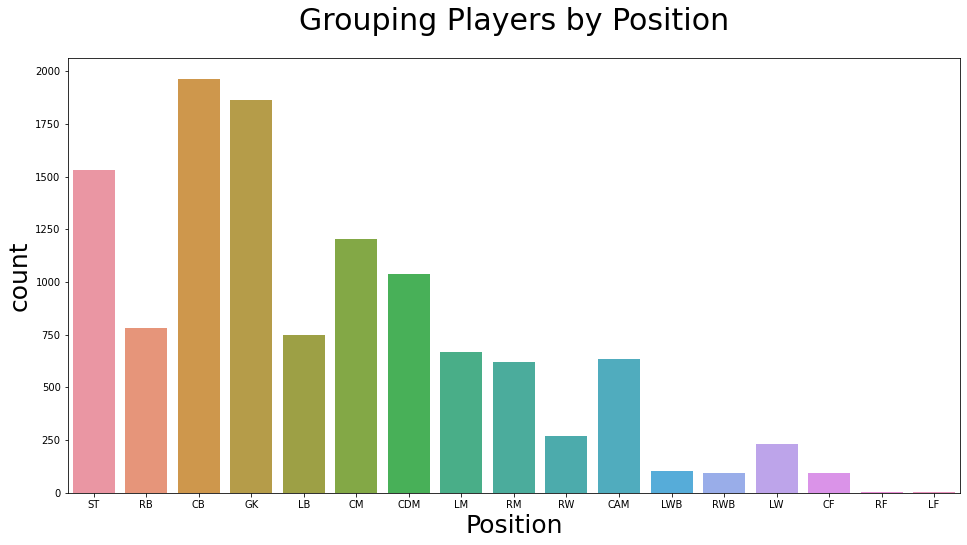

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.title('Grouping Players by Position', fontsize=30, y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x= 'Position', data=df);
plt.show()

Most player position are Centre Back (CB)

## **2.3 Player Nationality**

In [ ]:
value_counts = df['Nation'].value_counts().head(20)
value_counts

England          956
Spain            925
Germany          822
France           728
Argentina        478
Brazil           445
Japan            412
Netherlands      375
Italy            300
Portugal         280
United States    274
Belgium          266
Mexico           256
Austria          235
Sweden           234
Turkey           224
Poland           219
Norway           218
Denmark          212
Romania          202
Name: Nation, dtype: int64

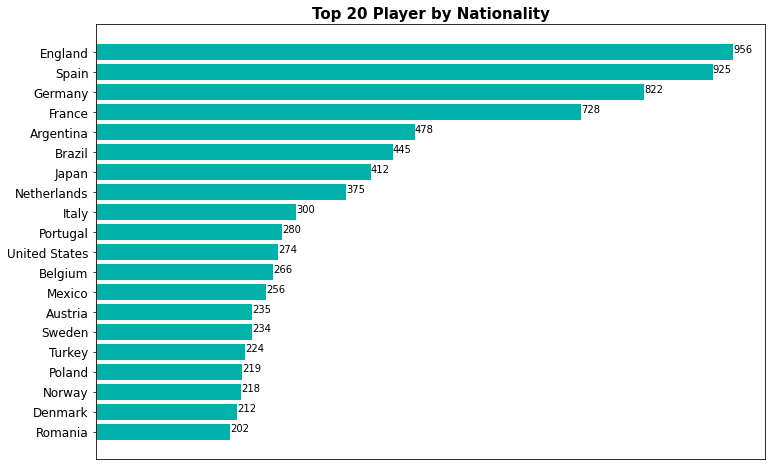

In [ ]:
value_counts = value_counts.sort_values()
# Vertical bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
plt.barh(value_counts.index, value_counts.values, color='#00B2A9')

for index, value in enumerate(value_counts.values):
    plt.text(value, index, str(value))


# size of the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# set a title for the plot
ax.set_title('Top 20 Player by Nationality', fontsize=15, fontweight='bold');
ax.get_xaxis().set_visible(False)

Most player nationality is English

## **2.4 Player League**

In [ ]:
league_counts = df['League'].value_counts().head(20)
league_counts

EFL Championship               598
LaLiga Santander               594
Major League Soccer            590
Premier League                 557
Serie A TIM                    555
LaLiga SmartBank               514
Ligue 1 Uber Eats              506
Bundesliga                     486
Süper Lig                      483
Meiji Yasuda J1 League         456
Bundesliga 2                   433
1A Pro League                  429
LIGA BBVA MX                   409
Eredivisie                     395
EFL League One                 363
Liga Portugal                  348
Ligue 2 BKT                    337
PKO Bank Polski Ekstraklasa    286
Liga Profesional de Fútbol     276
Liga I                         240
Name: League, dtype: int64

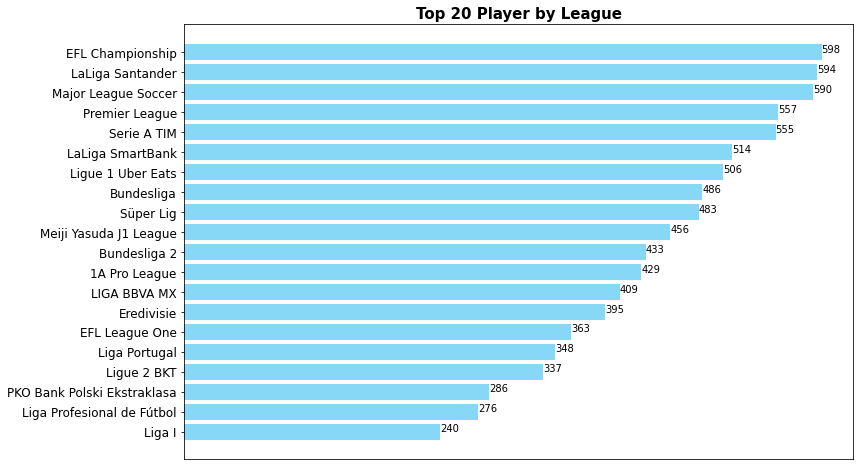

In [ ]:
league_counts = league_counts.sort_values()
# Vertical bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
plt.barh(league_counts.index, league_counts.values, color='#87D8F7')

for index, value in enumerate(league_counts.values):
    plt.text(value, index, str(value))


# size of the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# set a title for the plot
ax.set_title('Top 20 Player by League', fontsize=15, fontweight='bold');
ax.get_xaxis().set_visible(False)

Most player plays at EFL Championship

## **2.5 Player Team**

In [ ]:
team_counts = df['Team'].value_counts().head(20)
team_counts

FC Barcelona        36
Nott'm Forest       35
Newcastle Utd       35
Genoa               34
R. Valladolid CF    34
Real Betis          34
Everton             33
Latium              33
Brentford           32
Galatasaray         32
Başakşehir          32
Cádiz CF            32
RCD Mallorca        32
Olympiacos CFP      32
Villarreal CF       32
Málaga CF           32
CD Leganés          31
Venezia             31
Valencia CF         31
AS Saint-Étienne    31
Name: Team, dtype: int64

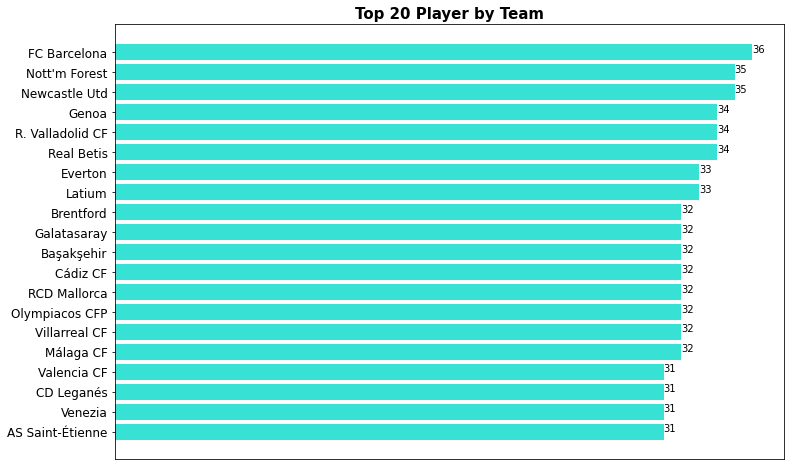

In [ ]:
team_counts = team_counts.sort_values()
# Vertical bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
plt.barh(team_counts.index, team_counts.values, color='#37E2D5')

for index, value in enumerate(team_counts.values):
    plt.text(value, index, str(value))


# size of the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# set a title for the plot
ax.set_title('Top 20 Player by Team', fontsize=15, fontweight='bold');
ax.get_xaxis().set_visible(False)

Team with the highest number of player is FC Barcelona

# **3. Best Player Analysis**

What's the best player in each position?

In [ ]:
df['Position'].value_counts()

CB     1965
GK     1864
ST     1533
CM     1205
CDM    1036
RB      780
LB      751
LM      669
CAM     636
RM      619
RW      270
LW      233
LWB     105
RWB      95
CF       95
LF        4
RF        2
Name: Position, dtype: int64

## **3.1 Best Goalkeeper**

In [ ]:
# Retrieve best goalkeeper
Goalkeeper = ((df[df['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(10))
Goalkeeper

,Name,Position,Team,League,Nation,Overall
4763,Jan Oblak,GK,Atlético de Madrid,LaLiga Santander,Slovenia,91
7027,Manuel Neuer,GK,FC Bayern München,Bundesliga,Germany,90
7062,Marc-André ter Stegen,GK,FC Barcelona,LaLiga Santander,Germany,90
2831,Ederson,GK,Manchester City,Premier League,Brazil,89
578,Alisson,GK,Liverpool,Premier League,Brazil,89
3831,Gianluigi Donnarumma,GK,Paris SG,Ligue 1 Uber Eats,Italy,89
10719,Thibaut Courtois,GK,Real Madrid,LaLiga Santander,Belgium,89
6030,Keylor Navas,GK,Paris SG,Ligue 1 Uber Eats,Costa Rica,88
4277,Hugo Lloris,GK,Spurs,Premier League,France,87
11402,Wojciech Szczęsny,GK,Piemonte Calcio,Serie A TIM,Poland,87


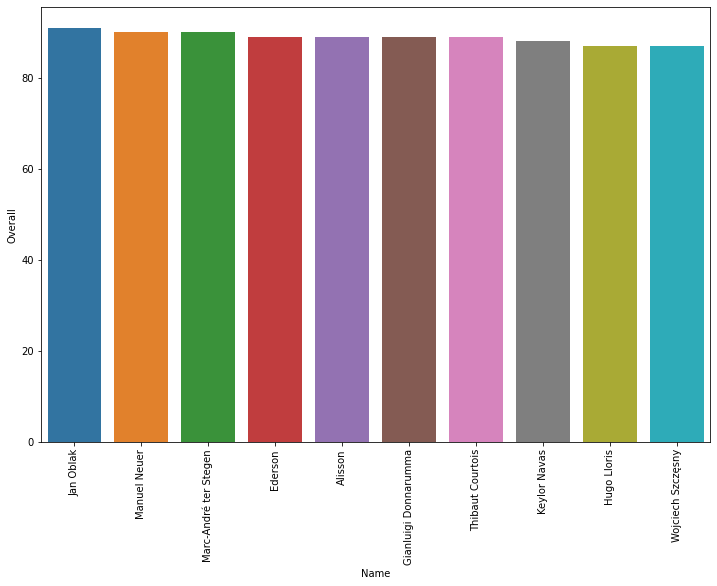

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Goalkeeper, x='Name', y='Overall')
plt.xticks(rotation=90)
plt.show()

Jan Oblak from Atletico de Madrid is goalkeeper with the highest overall rating.

![Oblak](https://user-images.githubusercontent.com/102453318/173122092-98d74c46-6893-4dc1-a8e0-edda6e2d7e62.jpg)

## **3.2 Best Defender**

In [ ]:
# Retrieve best defender
Defender = ((df[(df['Position']=='CB')|(df['Position']=='RB')|(df['Position']=='LB')|(df['Position']=='RWB')|(df['Position']=='LWB')]).sort_values(by=['Overall'], ascending=False).head(10))
Defender

,Name,Position,Team,League,Nation,Overall
11243,Virgil van Dijk,CB,Liverpool,Premier League,Netherlands,89
10154,Sergio Ramos,CB,Paris SG,Ligue 1 Uber Eats,Spain,88
758,Andrew Robertson,LB,Liverpool,Premier League,Scotland,87
11016,Trent Alexander-Arnold,RB,Liverpool,Premier League,England,87
7311,Marquinhos,CB,Paris SG,Ligue 1 Uber Eats,Brazil,87
9786,Rúben Dias,CB,Manchester City,Premier League,Portugal,87
10702,Theo Hernández,LWB,Milan,Serie A TIM,France,86
1097,Aymeric Laporte,CB,Manchester City,Premier League,Spain,86
7931,Milan Škriniar,CB,Inter,Serie A TIM,Slovakia,86
7483,Mats Hummels,CB,Borussia Dortmund,Bundesliga,Germany,86


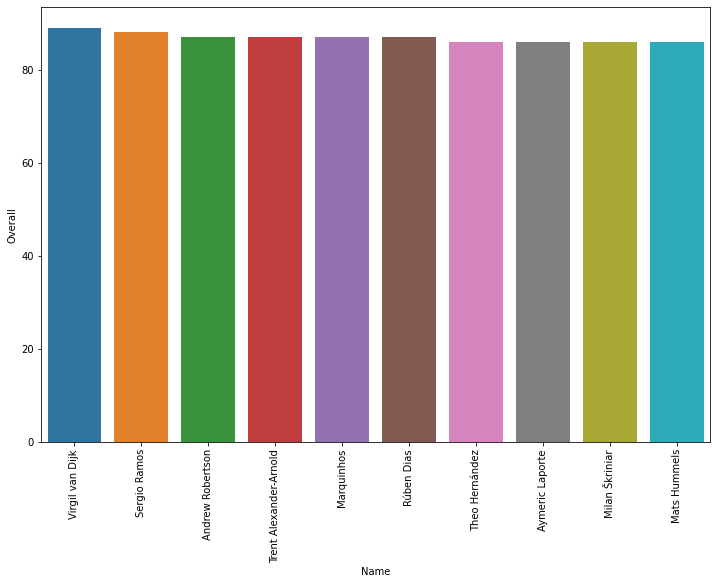

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Defender, x='Name', y='Overall')
plt.xticks(rotation=90)
plt.show()

Virgil van Dijk from Liverpool has the highest overall rating as defender.

![Virgil](https://user-images.githubusercontent.com/102453318/173122131-36a84592-2b0e-4a30-9942-5d9284595e18.jpg)

## **3.3 Best Midfielder**

In [ ]:
# Retrieve best midfielder
Midfielder = ((df[(df['Position']=='CM')|(df['Position']=='CDM')|(df['Position']=='LM')|(df['Position']=='RM')|(df['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(10))
Midfielder

,Name,Position,Team,League,Nation,Overall
5991,Kevin De Bruyne,CM,Manchester City,Premier League,Belgium,91
8175,N'Golo Kanté,CDM,Chelsea,Premier League,France,90
4212,Heung Min Son,LM,Spurs,Premier League,Korea Republic,89
5490,Joshua Kimmich,CDM,FC Bayern München,Bundesliga,Germany,89
1682,Casemiro,CDM,Real Madrid,LaLiga Santander,Brazil,89
1490,Bruno Fernandes,CAM,Manchester Utd,Premier League,Portugal,88
10993,Toni Kroos,CM,Real Madrid,LaLiga Santander,Germany,88
10759,Thomas Müller,CAM,FC Bayern München,Bundesliga,Germany,87
3621,Frenkie de Jong,CM,FC Barcelona,LaLiga Santander,Netherlands,87
8892,Paul Pogba,CM,Manchester Utd,Premier League,France,87


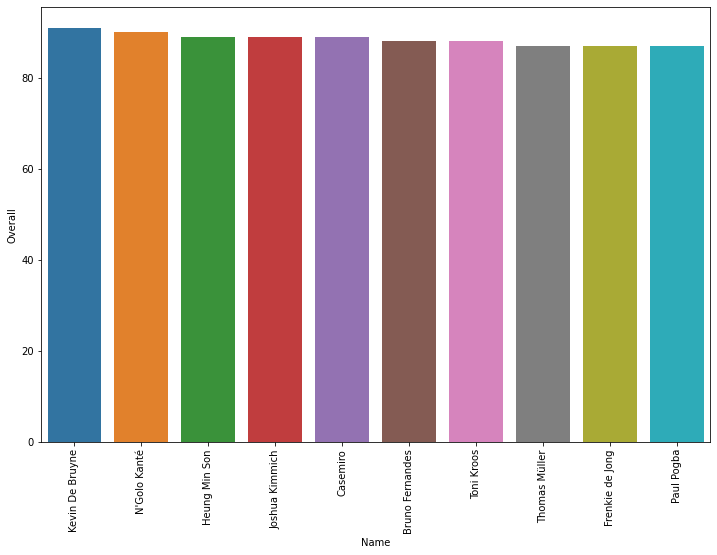

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Midfielder, x='Name', y='Overall')
plt.xticks(rotation=90)
plt.show()

Kevin De Bruyne, midfielder from Manchester City has the highest overall rating

![KDB](https://user-images.githubusercontent.com/102453318/173122098-86bf23ab-2849-4da3-a6ff-7cbac463acaa.jpg)

## **3.4 Best Forward**

In [ ]:
# Retrieve best forward
Forward = ((df[(df['Position']=='ST')|(df['Position']=='RW')|(df['Position']=='LW')|(df['Position']=='CF')|(df['Position']=='RF')|(df['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(10))
Forward

,Name,Position,Team,League,Nation,Overall
6553,Lionel Messi,RW,Paris SG,Ligue 1 Uber Eats,Argentina,93
9475,Robert Lewandowski,ST,FC Bayern München,Bundesliga,Poland,92
2044,Cristiano Ronaldo,ST,Manchester Utd,Premier League,Portugal,91
8302,Neymar Jr,LW,Paris SG,Ligue 1 Uber Eats,Brazil,91
6249,Kylian Mbappé,ST,Paris SG,Ligue 1 Uber Eats,France,91
4133,Harry Kane,ST,Spurs,Premier League,England,90
5846,Karim Benzema,CF,Real Madrid,LaLiga Santander,France,89
9817,Sadio Mané,LW,Liverpool,Premier League,Senegal,89
8004,Mohamed Salah,RW,Liverpool,Premier League,Egypt,89
6784,Luis Suárez,ST,Atlético de Madrid,LaLiga Santander,Uruguay,88


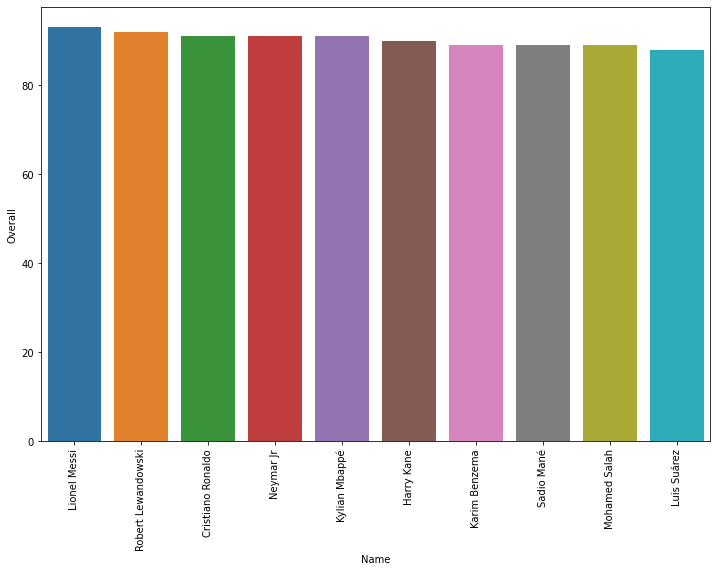

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Forward, x='Name', y='Overall')
plt.xticks(rotation=90)
plt.show()

Lionel Messi from Paris SG is the best overall forward rating.

![Messi](https://user-images.githubusercontent.com/102453318/173180059-b1ce40cc-302c-42ad-9796-d9e7f6da72e7.jpg)

# **4. Best Squad Analysis**

## **4.1 Top Five European Football Leagues**

What's the best squad according to FIFA 22 purely based on overall rating for top five european leagues(Premier League, LaLiga Santander,Bundesliga, Serie A TIM, and Ligue 1 Uber Eats) ?

In [ ]:
Top5Leagues = df[(df['League']=='Premier League')|(df['League']=='LaLiga Santander')|(df['League']=='Bundesliga')|(df['League']=='Serie A TIM')|(df['League']=='Ligue 1 Uber Eats')]
Top5Leagues.head(10)

,Name,Position,Team,League,Nation,Overall
5,Aaron Connolly,ST,Brighton,Premier League,Republic of Ireland,70
7,Aaron Cresswell,LB,West Ham,Premier League,England,79
9,Aaron Hickey,LB,Bologna,Serie A TIM,Scotland,69
18,Aaron Ramsdale,GK,Arsenal,Premier League,England,74
19,Aaron Ramsey,CM,Piemonte Calcio,Serie A TIM,Wales,80
22,Aaron Wan-Bissaka,RB,Manchester Utd,Premier League,England,83
23,Aarón,GK,Granada CF,LaLiga Santander,Spain,70
24,Aarón,LB,1. FSV Mainz 05,Bundesliga,Spain,74
30,Abdou Diallo,CB,Paris SG,Ligue 1 Uber Eats,Senegal,78
31,Abdou Harroui,CDM,Sassuolo,Serie A TIM,Netherlands,73


I pick 23 man squad players (2 GK, 4 CB, 2 RB/RWB, 2 LB/LWB, 5 CDM/CM/CAM, 2 RM/RW, 2 LM/LW, and 3 ST/CF/RF/LF)

In [ ]:
goalkeeper = ((Top5Leagues[Top5Leagues['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(2))
centreback = ((Top5Leagues[Top5Leagues['Position']=='CB']).sort_values(by=['Overall'], ascending=False).head(4))
rightback = ((Top5Leagues[(Top5Leagues['Position']=='RB')|(Top5Leagues['Position']=='RWB')]).sort_values(by=['Overall'], ascending=False).head(2))
leftback = ((Top5Leagues[(Top5Leagues['Position']=='LB')|(Top5Leagues['Position']=='LWB')]).sort_values(by=['Overall'], ascending=False).head(2))
centremidfielder = ((Top5Leagues[(Top5Leagues['Position']=='CM')|(Top5Leagues['Position']=='CDM')|(Top5Leagues['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(5))
rightmidfielder = ((Top5Leagues[(Top5Leagues['Position']=='RM')|(Top5Leagues['Position']=='RW')]).sort_values(by=['Overall'], ascending=False).head(2))
leftmidfielder = ((Top5Leagues[(Top5Leagues['Position']=='LM')|(Top5Leagues['Position']=='LW')]).sort_values(by=['Overall'], ascending=False).head(2))
striker = ((Top5Leagues[(Top5Leagues['Position']=='ST')|(Top5Leagues['Position']=='CF')|(Top5Leagues['Position']=='RF')|(Top5Leagues['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(3))

In [ ]:
Squad = [goalkeeper, centreback, rightback, leftback, centremidfielder, rightmidfielder, leftmidfielder, striker]

In [ ]:
Best_Squad = pd.concat(Squad)
Best_Squad

,Name,Position,Team,League,Nation,Overall
4763,Jan Oblak,GK,Atlético de Madrid,LaLiga Santander,Slovenia,91
7062,Marc-André ter Stegen,GK,FC Barcelona,LaLiga Santander,Germany,90
11243,Virgil van Dijk,CB,Liverpool,Premier League,Netherlands,89
10154,Sergio Ramos,CB,Paris SG,Ligue 1 Uber Eats,Spain,88
7311,Marquinhos,CB,Paris SG,Ligue 1 Uber Eats,Brazil,87
9786,Rúben Dias,CB,Manchester City,Premier League,Portugal,87
11016,Trent Alexander-Arnold,RB,Liverpool,Premier League,England,87
5561,João Cancelo,RB,Manchester City,Premier League,Portugal,86
758,Andrew Robertson,LB,Liverpool,Premier League,Scotland,87
5362,Jordi Alba,LB,FC Barcelona,LaLiga Santander,Spain,86


How player composition by League?

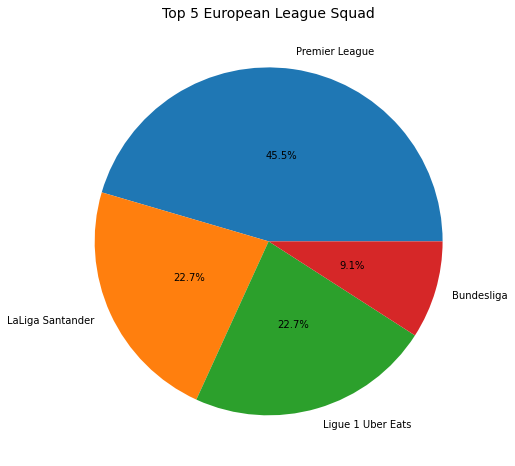

In [ ]:
# League Composition
pie, ax = plt.subplots(figsize=[12,8])
labels = Best_Squad["League"].value_counts().keys()
plt.pie(x=Best_Squad["League"].value_counts(), autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Top 5 European League Squad", fontsize=14);

In [ ]:
print('Top five European Leagues Squad overall rate is',round((Best_Squad['Overall'].mean())))

Top five European Leagues Squad overall rate is 89


## **4.2 Premier League**

Premier League is a top division English football league.

In [ ]:
Premier_League = df[df['League']=='Premier League']
Premier_League.head(10)

,Name,Position,Team,League,Nation,Overall
5,Aaron Connolly,ST,Brighton,Premier League,Republic of Ireland,70
7,Aaron Cresswell,LB,West Ham,Premier League,England,79
18,Aaron Ramsdale,GK,Arsenal,Premier League,England,74
22,Aaron Wan-Bissaka,RB,Manchester Utd,Premier League,England,83
36,Abdoulaye Doucouré,CM,Everton,Premier League,France,79
97,Adam Armstrong,ST,Southampton,Premier League,England,76
107,Adam Forshaw,CDM,Leeds United,Premier League,England,71
111,Adam Idah,ST,Norwich,Premier League,Republic of Ireland,67
115,Adam Lallana,CM,Brighton,Premier League,England,75
121,Adam Masina,LB,Watford,Premier League,Morocco,74


In [ ]:
goalkeeper = ((Premier_League[Premier_League['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(2))
centreback = ((Premier_League[Premier_League['Position']=='CB']).sort_values(by=['Overall'], ascending=False).head(4))
rightback = ((Premier_League[(Premier_League['Position']=='RB')|(Premier_League['Position']=='RWB')]).sort_values(by=['Overall'], ascending=False).head(2))
leftback = ((Premier_League[(Premier_League['Position']=='LB')|(Premier_League['Position']=='LWB')]).sort_values(by=['Overall'], ascending=False).head(2))
centremidfielder = ((Premier_League[(Premier_League['Position']=='CM')|(Premier_League['Position']=='CDM')|(Premier_League['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(5))
rightmidfielder = ((Premier_League[(Premier_League['Position']=='RM')|(Premier_League['Position']=='RW')]).sort_values(by=['Overall'], ascending=False).head(2))
leftmidfielder = ((Premier_League[(Top5Leagues['Position']=='LM')|(Premier_League['Position']=='LW')]).sort_values(by=['Overall'], ascending=False).head(2))
striker = ((Premier_League[(Premier_League['Position']=='ST')|(Premier_League['Position']=='CF')|(Premier_League['Position']=='RF')|(Premier_League['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
Premier_League_Squad = [goalkeeper, centreback, rightback, leftback, centremidfielder, rightmidfielder, leftmidfielder, striker]

In [ ]:
EPL_Best_Squad = pd.concat(Premier_League_Squad)
EPL_Best_Squad

,Name,Position,Team,League,Nation,Overall
578,Alisson,GK,Liverpool,Premier League,Brazil,89
2831,Ederson,GK,Manchester City,Premier League,Brazil,89
11243,Virgil van Dijk,CB,Liverpool,Premier League,Netherlands,89
9786,Rúben Dias,CB,Manchester City,Premier League,Portugal,87
9257,Raphaël Varane,CB,Manchester Utd,Premier League,France,86
1097,Aymeric Laporte,CB,Manchester City,Premier League,Spain,86
11016,Trent Alexander-Arnold,RB,Liverpool,Premier League,England,87
5561,João Cancelo,RB,Manchester City,Premier League,Portugal,86
758,Andrew Robertson,LB,Liverpool,Premier League,Scotland,87
6676,Lucas Digne,LB,Everton,Premier League,France,84


In [ ]:
print('Premier League Squad overall rate is',round((EPL_Best_Squad['Overall'].mean())))

Premier League Squad overall rate is 88


## **4.3 LaLiga Santander**

LaLiga Santander is a top division Spain football league.

In [ ]:
La_Liga = df[df['League']=='LaLiga Santander']
La_Liga.head(10)

,Name,Position,Team,League,Nation,Overall
23,Aarón,GK,Granada CF,LaLiga Santander,Spain,70
76,Abdón Prats,ST,RCD Mallorca,LaLiga Santander,Spain,70
140,Adama Traoré,RW,FC Barcelona,LaLiga Santander,Spain,78
160,Adnan Januzaj,RW,Real Sociedad,LaLiga Santander,Belgium,81
187,Adrià Pedrosa,LB,RCD Espanyol,LaLiga Santander,Spain,75
205,Agirrezabala,GK,Athletic Club,LaLiga Santander,Spain,61
249,Aihen Muñoz,LB,Real Sociedad,LaLiga Santander,Spain,74
250,Aimar Oroz,CAM,CA Osasuna,LaLiga Santander,Spain,64
254,Aitor,GK,Levante UD,LaLiga Santander,Spain,81
258,Aitor Ruibal,RM,Real Betis,LaLiga Santander,Spain,74


In [ ]:
goalkeeper = ((La_Liga[La_Liga['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(2))
centreback = ((La_Liga[La_Liga['Position']=='CB']).sort_values(by=['Overall'], ascending=False).head(4))
rightback = ((La_Liga[(La_Liga['Position']=='RB')|(La_Liga['Position']=='RWB')]).sort_values(by=['Overall'], ascending=False).head(2))
leftback = ((La_Liga[(La_Liga['Position']=='LB')|(La_Liga['Position']=='LWB')]).sort_values(by=['Overall'], ascending=False).head(2))
centremidfielder = ((La_Liga[(La_Liga['Position']=='CM')|(La_Liga['Position']=='CDM')|(La_Liga['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(5))
rightmidfielder = ((La_Liga[(La_Liga['Position']=='RM')|(La_Liga['Position']=='RW')]).sort_values(by=['Overall'], ascending=False).head(2))
leftmidfielder = ((La_Liga[(Top5Leagues['Position']=='LM')|(La_Liga['Position']=='LW')]).sort_values(by=['Overall'], ascending=False).head(2))
striker = ((La_Liga[(La_Liga['Position']=='ST')|(La_Liga['Position']=='CF')|(La_Liga['Position']=='RF')|(La_Liga['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
La_Liga_Squad = [goalkeeper, centreback, rightback, leftback, centremidfielder, rightmidfielder, leftmidfielder, striker]

In [ ]:
LaLiga_Best_Squad = pd.concat(La_Liga_Squad)
LaLiga_Best_Squad

,Name,Position,Team,League,Nation,Overall
4763,Jan Oblak,GK,Atlético de Madrid,LaLiga Santander,Slovenia,91
7062,Marc-André ter Stegen,GK,FC Barcelona,LaLiga Santander,Germany,90
5539,José María Giménez,CB,Atlético de Madrid,LaLiga Santander,Uruguay,84
10420,Stefan Savić,CB,Atlético de Madrid,LaLiga Santander,Montenegro,84
3331,Felipe,CB,Atlético de Madrid,LaLiga Santander,Brazil,84
2355,David Alaba,CB,Real Madrid,LaLiga Santander,Austria,84
1680,Carvajal,RB,Real Madrid,LaLiga Santander,Spain,85
5015,Jesús Navas,RB,Sevilla FC,LaLiga Santander,Spain,84
5362,Jordi Alba,LB,FC Barcelona,LaLiga Santander,Spain,86
7155,Marcos Acuña,LB,Sevilla FC,LaLiga Santander,Argentina,84


Since Sergio Aguero already retire, we have to find other striker.

In [ ]:
La_Liga = La_Liga.drop(10137)

In [ ]:
goalkeeper = ((La_Liga[La_Liga['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(2))
centreback = ((La_Liga[La_Liga['Position']=='CB']).sort_values(by=['Overall'], ascending=False).head(4))
rightback = ((La_Liga[(La_Liga['Position']=='RB')|(La_Liga['Position']=='RWB')]).sort_values(by=['Overall'], ascending=False).head(2))
leftback = ((La_Liga[(La_Liga['Position']=='LB')|(La_Liga['Position']=='LWB')]).sort_values(by=['Overall'], ascending=False).head(2))
centremidfielder = ((La_Liga[(La_Liga['Position']=='CM')|(La_Liga['Position']=='CDM')|(La_Liga['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(5))
rightmidfielder = ((La_Liga[(La_Liga['Position']=='RM')|(La_Liga['Position']=='RW')]).sort_values(by=['Overall'], ascending=False).head(2))
leftmidfielder = ((La_Liga[(Top5Leagues['Position']=='LM')|(La_Liga['Position']=='LW')]).sort_values(by=['Overall'], ascending=False).head(2))
striker = ((La_Liga[(La_Liga['Position']=='ST')|(La_Liga['Position']=='CF')|(La_Liga['Position']=='RF')|(La_Liga['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
La_Liga_Squad = [goalkeeper, centreback, rightback, leftback, centremidfielder, rightmidfielder, leftmidfielder, striker]

In [ ]:
# Re-pick best LaLiga Santander Squad
LaLiga_Best_Squad = pd.concat(La_Liga_Squad)
LaLiga_Best_Squad

,Name,Position,Team,League,Nation,Overall
4763,Jan Oblak,GK,Atlético de Madrid,LaLiga Santander,Slovenia,91
7062,Marc-André ter Stegen,GK,FC Barcelona,LaLiga Santander,Germany,90
5539,José María Giménez,CB,Atlético de Madrid,LaLiga Santander,Uruguay,84
10420,Stefan Savić,CB,Atlético de Madrid,LaLiga Santander,Montenegro,84
3331,Felipe,CB,Atlético de Madrid,LaLiga Santander,Brazil,84
2355,David Alaba,CB,Real Madrid,LaLiga Santander,Austria,84
1680,Carvajal,RB,Real Madrid,LaLiga Santander,Spain,85
5015,Jesús Navas,RB,Sevilla FC,LaLiga Santander,Spain,84
5362,Jordi Alba,LB,FC Barcelona,LaLiga Santander,Spain,86
7155,Marcos Acuña,LB,Sevilla FC,LaLiga Santander,Argentina,84


In [ ]:
print('LaLiga Santander Squad overall rate is',round((LaLiga_Best_Squad['Overall'].mean())))

LaLiga Santander Squad overall rate is 86


## **4.4 Bundesliga**

Bundesliga is a top division Germany football league.

In [ ]:
Bundesliga = df[df['League']=='Bundesliga']
Bundesliga.head(10)

,Name,Position,Team,League,Nation,Overall
24,Aarón,LB,1. FSV Mainz 05,Bundesliga,Spain,74
43,Abdourahmane Barry,CB,Fürth,Bundesliga,France,64
157,Admir Mehmedi,CF,VfL Wolfsburg,Bundesliga,Switzerland,74
166,Adrian Fein,CDM,Fürth,Bundesliga,Germany,72
202,Afimico Pululu,LM,Fürth,Bundesliga,Angola,68
261,Ajdin Hrustić,RM,Frankfurt,Bundesliga,Australia,70
296,Alassane Plea,ST,M'gladbach,Bundesliga,France,79
375,Alessandro Schöpf,CM,Arminia Bielefeld,Bundesliga,Austria,71
446,Alexander Hack,CB,1. FSV Mainz 05,Bundesliga,Germany,71
464,Alexander Schwolow,GK,Hertha Berlin,Bundesliga,Germany,77


In [ ]:
goalkeeper = ((Bundesliga[Bundesliga['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(2))
centreback = ((Bundesliga[Bundesliga['Position']=='CB']).sort_values(by=['Overall'], ascending=False).head(4))
rightback = ((Bundesliga[(Bundesliga['Position']=='RB')|(Bundesliga['Position']=='RWB')]).sort_values(by=['Overall'], ascending=False).head(2))
leftback = ((Bundesliga[(Bundesliga['Position']=='LB')|(Bundesliga['Position']=='LWB')]).sort_values(by=['Overall'], ascending=False).head(2))
centremidfielder = ((Bundesliga[(Bundesliga['Position']=='CM')|(Bundesliga['Position']=='CDM')|(Bundesliga['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(5))
rightmidfielder = ((Bundesliga[(Bundesliga['Position']=='RM')|(Bundesliga['Position']=='RW')]).sort_values(by=['Overall'], ascending=False).head(2))
leftmidfielder = ((Bundesliga[(Bundesliga['Position']=='LM')|(Bundesliga['Position']=='LW')]).sort_values(by=['Overall'], ascending=False).head(2))
striker = ((Bundesliga[(Bundesliga['Position']=='ST')|(Bundesliga['Position']=='CF')|(Bundesliga['Position']=='RF')|(Bundesliga['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(3))

In [ ]:
Bundes_Liga_Squad = [goalkeeper, centreback, rightback, leftback, centremidfielder, rightmidfielder, leftmidfielder, striker]

In [ ]:
Bundesliga_Best_Squad = pd.concat(Bundes_Liga_Squad)
Bundesliga_Best_Squad

,Name,Position,Team,League,Nation,Overall
7027,Manuel Neuer,GK,FC Bayern München,Bundesliga,Germany,90
6125,Koen Casteels,GK,VfL Wolfsburg,Bundesliga,Belgium,86
7483,Mats Hummels,CB,Borussia Dortmund,Bundesliga,Germany,86
7540,Matthias Ginter,CB,M'gladbach,Bundesliga,Germany,84
8439,Niklas Süle,CB,FC Bayern München,Bundesliga,Germany,82
2457,Dayot Upamecano,CB,FC Bayern München,Bundesliga,France,82
8500,Nordi Mukiele,RWB,RB Leipzig,Bundesliga,France,81
10411,Stefan Lainer,RB,M'gladbach,Bundesliga,Austria,80
9256,Raphaël Guerreiro,LB,Borussia Dortmund,Bundesliga,Portugal,84
841,Angeliño,LWB,RB Leipzig,Bundesliga,Spain,83


In [ ]:
print('Bundesliga Squad overall rate is',round((Bundesliga_Best_Squad['Overall'].mean())))

Bundesliga Squad overall rate is 85


## **4.5 Serie A TIM**

Serie A TIM is a top division Italy football league.

In [ ]:
Serie_A = df[df['League']=='Serie A TIM']
Serie_A.head(10)

,Name,Position,Team,League,Nation,Overall
9,Aaron Hickey,LB,Bologna,Serie A TIM,Scotland,69
19,Aaron Ramsey,CM,Piemonte Calcio,Serie A TIM,Wales,80
31,Abdou Harroui,CDM,Sassuolo,Serie A TIM,Netherlands,73
40,Abdoulaye Touré,CDM,Genoa,Serie A TIM,France,72
120,Adam Marušić,RWB,Latium,Serie A TIM,Montenegro,79
124,Adam Ounas,RW,Napoli,Serie A TIM,Algeria,74
138,Adama Soumaoro,CB,Bologna,Serie A TIM,France,75
177,Adrian Šemper,GK,Genoa,Serie A TIM,Croatia,74
182,Adrien Rabiot,CM,Piemonte Calcio,Serie A TIM,France,81
183,Adrien Silva,CM,Sampdoria,Serie A TIM,Portugal,76


In [ ]:
goalkeeper = ((Serie_A[Serie_A['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(2))
centreback = ((Serie_A[Serie_A['Position']=='CB']).sort_values(by=['Overall'], ascending=False).head(4))
rightback = ((Serie_A[(Serie_A['Position']=='RB')|(Serie_A['Position']=='RWB')]).sort_values(by=['Overall'], ascending=False).head(2))
leftback = ((Serie_A[Serie_A['Position']=='LB']).sort_values(by=['Overall'], ascending=False).head(2))
centremidfielder = ((Serie_A[(Serie_A['Position']=='CM')|(Serie_A['Position']=='CDM')|(Serie_A['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(5))
rightmidfielder = ((Serie_A[(Serie_A['Position']=='RM')|(Serie_A['Position']=='RW')]).sort_values(by=['Overall'], ascending=False).head(2))
leftmidfielder = ((Serie_A[(Serie_A['Position']=='LM')|(Serie_A['Position']=='LW')]).sort_values(by=['Overall'], ascending=False).head(2))
striker = ((Serie_A[(Serie_A['Position']=='ST')|(Serie_A['Position']=='CF')|(Serie_A['Position']=='RF')|(Serie_A['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(3))

In [ ]:
Serie_A_Squad = [goalkeeper, centreback, rightback, leftback, centremidfielder, rightmidfielder, leftmidfielder, striker]

In [ ]:
Serie_A_Best_Squad = pd.concat(Serie_A_Squad)
Serie_A_Best_Squad

,Name,Position,Team,League,Nation,Overall
11402,Wojciech Szczęsny,GK,Piemonte Calcio,Serie A TIM,Poland,87
9890,Samir Handanovič,GK,Inter,Serie A TIM,Slovenia,86
3864,Giorgio Chiellini,CB,Piemonte Calcio,Serie A TIM,Italy,86
5813,Kalidou Koulibaly,CB,Napoli,Serie A TIM,Senegal,86
7931,Milan Škriniar,CB,Inter,Serie A TIM,Slovakia,86
7549,Matthijs de Ligt,CB,Piemonte Calcio,Serie A TIM,Netherlands,85
5605,Juan Cuadrado,RB,Piemonte Calcio,Serie A TIM,Colombia,83
2559,Denzel Dumfries,RB,Inter,Serie A TIM,Netherlands,82
10703,Theo Hernández,LB,Milan,Serie A TIM,France,84
420,Alex Sandro,LB,Piemonte Calcio,Serie A TIM,Brazil,83


In [ ]:
# There are real team name, need to change to real name
Serie_A_Best_Squad['Team'].replace({'Piemonte Calcio': 'Juventus', 'Latium': 'Lazio'}, inplace=True)
Serie_A_Best_Squad

,Name,Position,Team,League,Nation,Overall
11402,Wojciech Szczęsny,GK,Juventus,Serie A TIM,Poland,87
9890,Samir Handanovič,GK,Inter,Serie A TIM,Slovenia,86
3864,Giorgio Chiellini,CB,Juventus,Serie A TIM,Italy,86
5813,Kalidou Koulibaly,CB,Napoli,Serie A TIM,Senegal,86
7931,Milan Škriniar,CB,Inter,Serie A TIM,Slovakia,86
7549,Matthijs de Ligt,CB,Juventus,Serie A TIM,Netherlands,85
5605,Juan Cuadrado,RB,Juventus,Serie A TIM,Colombia,83
2559,Denzel Dumfries,RB,Inter,Serie A TIM,Netherlands,82
10703,Theo Hernández,LB,Milan,Serie A TIM,France,84
420,Alex Sandro,LB,Juventus,Serie A TIM,Brazil,83


In [ ]:
print('Serie A TIM Squad overall rate is',round((Serie_A_Best_Squad['Overall'].mean())))

Serie A TIM Squad overall rate is 85


## **4.6 Ligue 1 Uber Eats**

Ligue 1 Uber Eats is a top division France football league.

In [ ]:
Ligue_1 = df[df['League']=='Ligue 1 Uber Eats']
Ligue_1.head(10)

,Name,Position,Team,League,Nation,Overall
30,Abdou Diallo,CB,Paris SG,Ligue 1 Uber Eats,Senegal,78
35,Abdoulaye Bamba,RB,Angers SCO,Ligue 1 Uber Eats,Ivory Coast,73
45,Abdu Conté,LB,ESTAC Troyes,Ligue 1 Uber Eats,Portugal,68
93,Achraf Hakimi,RB,Paris SG,Ligue 1 Uber Eats,Morocco,85
113,Adam Jakubech,GK,LOSC Lille,Ligue 1 Uber Eats,Slovakia,68
153,Adil Aouchiche,LM,AS Saint-Étienne,Ligue 1 Uber Eats,France,74
169,Adrian Grbic,ST,FC Lorient,Ligue 1 Uber Eats,Austria,70
185,Adrien Thomasson,CAM,Strasbourg,Ligue 1 Uber Eats,France,76
186,Adrien Truffert,LB,Stade Rennais FC,Ligue 1 Uber Eats,France,75
219,Ahmadou Bamba Dieng,ST,OM,Ligue 1 Uber Eats,Senegal,68


In [ ]:
goalkeeper = ((Ligue_1[Ligue_1['Position']=='GK']).sort_values(by=['Overall'], ascending=False).head(2))
centreback = ((Ligue_1[Ligue_1['Position']=='CB']).sort_values(by=['Overall'], ascending=False).head(4))
rightback = ((Ligue_1[(Ligue_1['Position']=='RB')|(Ligue_1['Position']=='RWB')]).sort_values(by=['Overall'], ascending=False).head(2))
leftback = ((Ligue_1[(Ligue_1['Position']=='LB')|(Ligue_1['Position']=='LWB')]).sort_values(by=['Overall'], ascending=False).head(2))
centremidfielder = ((Ligue_1[(Ligue_1['Position']=='CM')|(Ligue_1['Position']=='CDM')|(Ligue_1['Position']=='CAM')]).sort_values(by=['Overall'], ascending=False).head(5))
rightmidfielder = ((Ligue_1[(Ligue_1['Position']=='RM')|(Ligue_1['Position']=='RW')]).sort_values(by=['Overall'], ascending=False).head(2))
leftmidfielder = ((Ligue_1[(Ligue_1['Position']=='LM')|(Ligue_1['Position']=='LW')]).sort_values(by=['Overall'], ascending=False).head(2))
striker = ((Ligue_1[(Ligue_1['Position']=='ST')|(Ligue_1['Position']=='CF')|(Ligue_1['Position']=='RF')|(Ligue_1['Position']=='LF')]).sort_values(by=['Overall'], ascending=False).head(3))

In [ ]:
Ligue_1_Squad = [goalkeeper, centreback, rightback, leftback, centremidfielder, rightmidfielder, leftmidfielder, striker]

In [ ]:
Ligue_1_Best_Squad = pd.concat(Ligue_1_Squad)
Ligue_1_Best_Squad

,Name,Position,Team,League,Nation,Overall
3831,Gianluigi Donnarumma,GK,Paris SG,Ligue 1 Uber Eats,Italy,89
6030,Keylor Navas,GK,Paris SG,Ligue 1 Uber Eats,Costa Rica,88
10154,Sergio Ramos,CB,Paris SG,Ligue 1 Uber Eats,Spain,88
7311,Marquinhos,CB,Paris SG,Ligue 1 Uber Eats,Brazil,87
9118,Presnel Kimpembe,CB,Paris SG,Ligue 1 Uber Eats,France,83
5520,José Fonte,CB,LOSC Lille,Ligue 1 Uber Eats,Portugal,81
93,Achraf Hakimi,RB,Paris SG,Ligue 1 Uber Eats,Morocco,85
11705,Zeki Çelik,RB,LOSC Lille,Ligue 1 Uber Eats,Turkey,79
5597,Juan Bernat,LB,Paris SG,Ligue 1 Uber Eats,Spain,82
2956,Emerson,LB,OL,Ligue 1 Uber Eats,Italy,78


In [ ]:
print('Ligue 1 Uber Eats Squad overall rate is',round((Ligue_1_Best_Squad['Overall'].mean())))

Ligue 1 Uber Eats Squad overall rate is 85


# **5 Squad Comparison**

In [ ]:
dic = {
    'League':['Premier League','LaLiga Santander','Bundesliga','Serie A TIM','Ligue 1 Uber Eats'],
    'Overall':[(round((EPL_Best_Squad['Overall'].mean()))), (round((LaLiga_Best_Squad['Overall'].mean()))), (round((Bundesliga_Best_Squad['Overall'].mean()))), (round((Serie_A_Best_Squad['Overall'].mean()))), (round((Ligue_1_Best_Squad['Overall'].mean())))]}

Top_5_Leagues = (pd.DataFrame(data=dic)).sort_values(by=['Overall'], ascending=False)
Top_5_Leagues

,League,Overall
0,Premier League,88
1,LaLiga Santander,86
2,Bundesliga,85
3,Serie A TIM,85
4,Ligue 1 Uber Eats,85


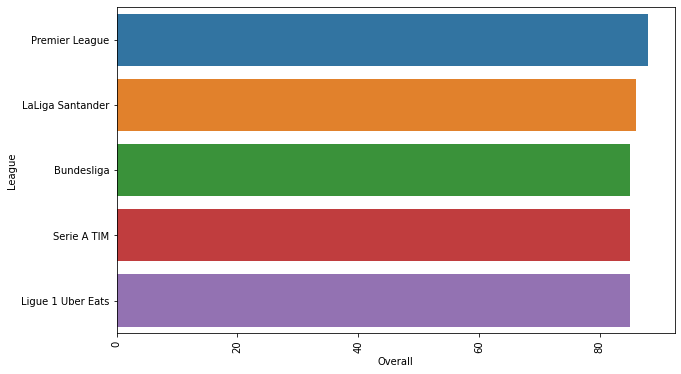

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=Top_5_Leagues, x='Overall', y='League')
plt.xticks(rotation=90)
plt.show()

![epl](https://user-images.githubusercontent.com/102453318/173180253-889f58e4-be65-4ee1-bb49-2080a58c46e5.jpg)

## **5.1 Conclusion**

So based purely on the FIFA 22 data:
- Best player each position:
    - Goalkeeper = Jan Oblak (Atletico de Madrid)
    - Defender = Virgil van Dijk (Liverpool)
    - Midfielder = Kevin De Bruyne (Manchester City)
    - Forward = Lionel Messi (Paris SG)
- Best player squad from Premier League (English top division football league) has the highest average rating other than four top division football league. It indicates Premier League become the most competitive football league in Europe.